# Plot SDSS Photometric Filters

In [3]:
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

Get Vega reference spectrum.

In [5]:
help(fetch_vega_spectrum)

Help on function fetch_vega_spectrum in module astroML.datasets.sdss_filters:

fetch_vega_spectrum(data_home=None, download_if_missing=True)
    Loader for Vega reference spectrum
    
    Parameters
    ----------
    fname : str
        filter name: must be one of 'ugriz'
    data_home : optional, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit learn data is stored in '~/astroML_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    Returns
    -------
    data : ndarray
        data[0] is the array of wavelength in angstroms
        data[1] is the array of fluxes in Jy (F_nu, not F_lambda)



In [8]:
vega_spectrum = fetch_vega_spectrum()

In [9]:
vega_spectrum.shape

(2, 1274)

In [11]:
vega_lam = vega_spectrum[0]
vega_power = vega_spectrum[1] / 2.1 / vega_spectrum[1].max()

In [22]:
vega_lam

array([   915.,    925.,    935., ..., 390000., 395000., 400000.])

In [23]:
vega_power

array([1.52881406e-08, 8.22819204e-08, 1.18176962e-07, ...,
       4.13636323e-08, 3.93149989e-08, 3.73805273e-08])

Get SDSS filter profiles.

In [12]:
help(fetch_sdss_filter)

Help on function fetch_sdss_filter in module astroML.datasets.sdss_filters:

fetch_sdss_filter(fname, data_home=None, download_if_missing=True)
    Loader for SDSS Filter profiles
    
    Parameters
    ----------
    fname : str
        filter name: must be one of 'ugriz'
    data_home : optional, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit learn data is stored in '~/astroML_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    Returns
    -------
    data : ndarray
        data is an array of shape (5, Nlam)
        first row: wavelength in angstroms
        second row: sensitivity to point source, airmass 1.3
        third row: sensitivity to extended source, airmass 1.3
        fourth row: sensitivity to extended source, airmass 0.0
        fifth row:

In [17]:
filter_names = ['u', 'g', 'r', 'i', 'z']

In [18]:
filter_colors = {
    'u': 'b',
    'g': 'g',
    'r': 'r',
    'i': 'm',
    'z': 'k'
}
text_pos = {
    'u': 3500,
    'g': 4600,
    'r': 6100,
    'i': 7500,
    'z': 8800
}

In [19]:
sdss_filters = {}
for fltr in filter_names:
    sdss_filters[fltr] = fetch_sdss_filter(fltr)

In [20]:
sdss_filters['u'].shape

(5, 47)

In [21]:
sdss_filters['u']

array([[2.980e+03, 3.005e+03, 3.030e+03, 3.055e+03, 3.080e+03, 3.105e+03,
        3.130e+03, 3.155e+03, 3.180e+03, 3.205e+03, 3.230e+03, 3.255e+03,
        3.280e+03, 3.305e+03, 3.330e+03, 3.355e+03, 3.380e+03, 3.405e+03,
        3.430e+03, 3.455e+03, 3.480e+03, 3.505e+03, 3.530e+03, 3.555e+03,
        3.580e+03, 3.605e+03, 3.630e+03, 3.655e+03, 3.680e+03, 3.705e+03,
        3.730e+03, 3.755e+03, 3.780e+03, 3.805e+03, 3.830e+03, 3.855e+03,
        3.880e+03, 3.905e+03, 3.930e+03, 3.955e+03, 3.980e+03, 4.005e+03,
        4.030e+03, 4.055e+03, 4.080e+03, 4.105e+03, 4.130e+03],
       [0.000e+00, 1.000e-04, 5.000e-04, 1.300e-03, 2.600e-03, 5.200e-03,
        9.300e-03, 1.610e-02, 2.400e-02, 3.230e-02, 4.050e-02, 4.850e-02,
        5.610e-02, 6.340e-02, 7.000e-02, 7.560e-02, 8.030e-02, 8.480e-02,
        8.830e-02, 9.170e-02, 9.590e-02, 1.001e-01, 1.029e-01, 1.044e-01,
        1.053e-01, 1.063e-01, 1.075e-01, 1.085e-01, 1.084e-01, 1.064e-01,
        1.024e-01, 9.660e-02, 8.870e-02, 7.870e-

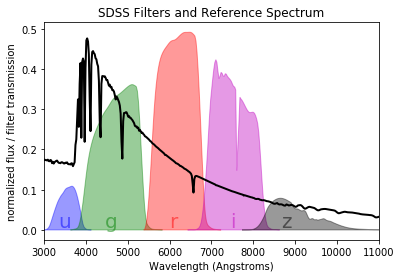

In [29]:
text_kwargs = dict(fontsize=20, ha='center', va='center', alpha=0.5)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(vega_lam, vega_power, '-k', lw=2)

for fltr in filter_names:
    ax.fill(
        sdss_filters[fltr][0], sdss_filters[fltr][1],
        ec=filter_colors[fltr], fc=filter_colors[fltr], alpha=0.4)
    ax.text(text_pos[fltr], 0.02, fltr, color=filter_colors[fltr], **text_kwargs)

ax.set_xlim(3000, 11000)
ax.set_title('SDSS Filters and Reference Spectrum')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('normalized flux / filter transmission')

plt.show()